In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image
%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

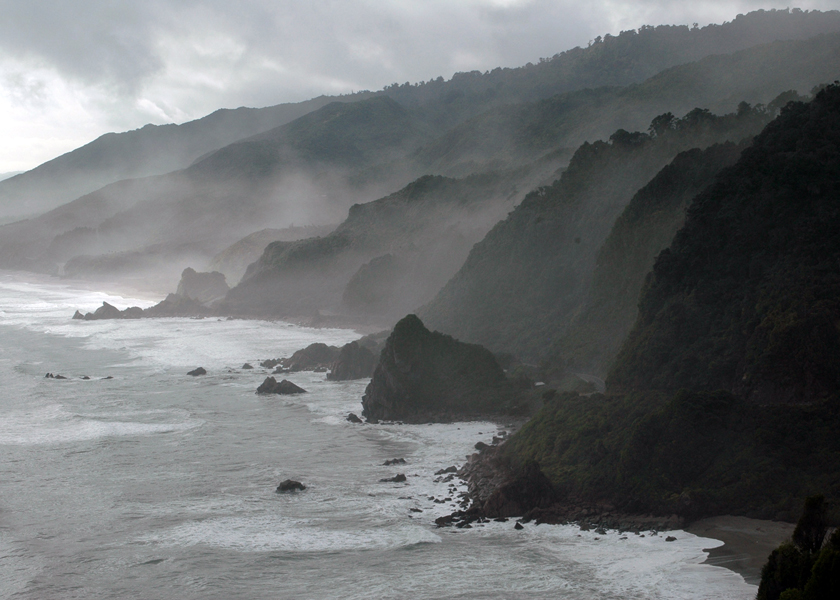

In [11]:
# Original image
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

Image(filename = "New_Zealand_Coast.jpg")

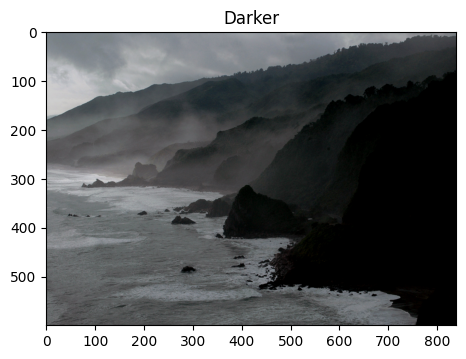

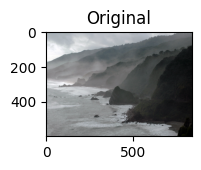

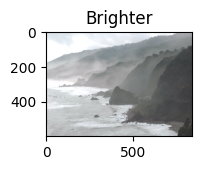

In [10]:
# Addition to increase Brightness
matrix = np.ones(img_rgb.shape, dtype = "uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize = [18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Darker"); plt.show()
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original"); plt.show()
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter"); plt.show()

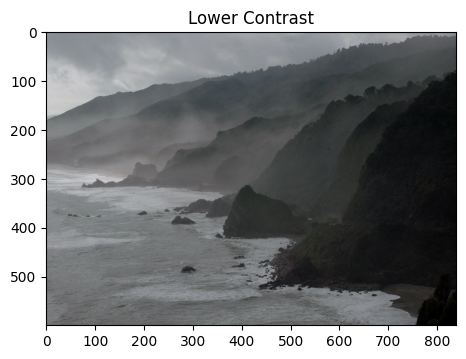

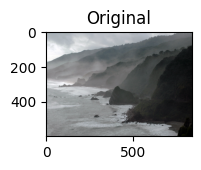

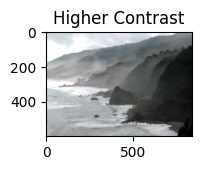

In [14]:
# Multiplication to change Contrast
matrix_low_contrast = np.ones(img_rgb.shape) * 0.8
matrix_high_contrast = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
# After multiplying, the values already high become greater than 255
# To overcome, we add 0, 255 at the end
img_rgb_brighter = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix_high_contrast), 0, 255))

# Show the images
plt.figure(figsize = [18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Lower Contrast"); plt.show()
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original"); plt.show()
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher Contrast"); plt.show()

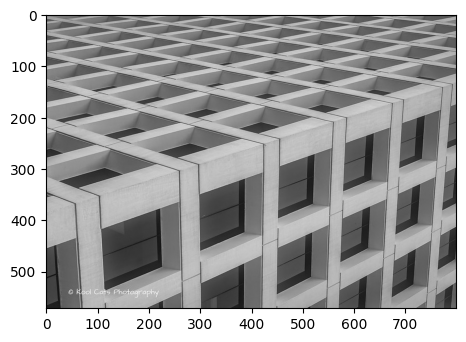

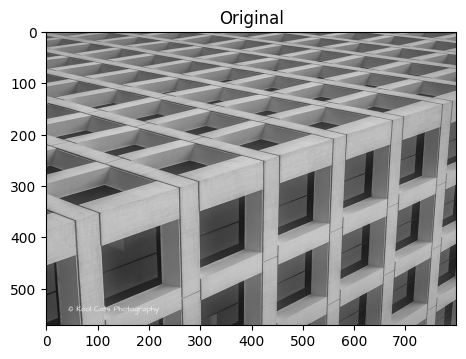

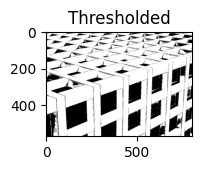

(572, 800)


In [16]:
# Image Thresholding
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize = [18, 5])
plt.subplot(131); plt.imshow(img_read, cmap = "gray"); plt.title("Original"); plt.show()
plt.subplot(132); plt.imshow(img_thresh, cmap = "gray"); plt.title("Thresholded"); plt.show()

print(img_thresh.shape)

In [ ]:
# Application: Sheet Music Reader
